# Accor Data

In [57]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [58]:
accre = pd.read_csv('./data/july-2017-thru-june-2018.txt', sep="|", chunksize=5000).get_chunk() 
accre.head(10)

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21
5,15811618,15811618,accre,production,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01T05:00:01,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1063,skim_test
6,15811619,15811619,accre,production,cms_stage2,cms,31000,tuos,126986.0,2017-07-01T05:00:02,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1062,skim_test
7,15811621,15811621,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:22,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_33ee450ebdc4
8,15811624,15811624,accre,production,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01T05:01:01,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp670,skim_test
9,15811625,15811625,accre,production,cms_stage2,cms,31000,tuos,126986.0,2017-07-01T05:01:02,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1078,skim_test


In [59]:
accre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
JobID        5000 non-null object
JobIDRaw     5000 non-null int64
Cluster      5000 non-null object
Partition    5000 non-null object
Account      5000 non-null object
Group        5000 non-null object
GID          5000 non-null int64
User         5000 non-null object
UID          3821 non-null float64
Submit       5000 non-null object
Eligible     5000 non-null object
Start        5000 non-null object
End          5000 non-null object
Elapsed      5000 non-null object
ExitCode     5000 non-null object
State        5000 non-null object
NNodes       5000 non-null int64
NCPUS        5000 non-null int64
ReqCPUS      5000 non-null int64
ReqMem       5000 non-null object
ReqGRES      13 non-null object
ReqTRES      5000 non-null object
Timelimit    5000 non-null object
NodeList     5000 non-null object
JobName      5000 non-null object
dtypes: float64(1), int64(5), object(19)
memory u

In [60]:
accre.shape

(5000, 25)

In [61]:
accre.columns

Index(['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'],
      dtype='object')

In [62]:
# convert Submit and Start to datetime
accre['Submit'] = pd.to_datetime(accre['Submit'], format='%Y/%m/%d')
accre['Start'] = pd.to_datetime(accre['Start'], format='%Y/%m/%d')

In [63]:
# check head of Submit
accre.Submit.head()

0   2017-07-02 00:40:58
1   2017-07-02 00:40:58
2   2017-07-02 00:40:58
3   2017-07-02 00:40:58
4   2017-07-01 05:00:00
Name: Submit, dtype: datetime64[ns]

In [64]:
# check head of Start
accre.Start.head()

0   2017-07-03 02:13:59
1   2017-07-03 02:20:08
2   2017-07-03 02:41:13
3   2017-07-03 02:51:53
4   2017-07-01 05:00:01
Name: Start, dtype: datetime64[ns]

In [65]:
# create Queue_Time column = Start - Submit
accre['Queue_Time'] = accre['Start'] - accre['Submit']
accre.Queue_Time.head()

0   1 days 01:33:01
1   1 days 01:39:10
2   1 days 02:00:15
3   1 days 02:10:55
4   0 days 00:00:01
Name: Queue_Time, dtype: timedelta64[ns]

In [66]:
#remove unnecessary columns
cols = ['Partition', 'JobIDRaw', 'Cluster', 'UID', 'JobName']
accre_reduced = accre.drop(columns=cols)
accre_reduced.head()

,JobID,Account,Group,GID,User,Submit,Eligible,Start,End,Elapsed,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,Queue_Time
0,15806649,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:13:59,2017-07-04T03:19:20,1-01:05:21,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,1 days 01:33:01
1,15806664,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:20:08,2017-07-04T02:11:55,23:51:47,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,1 days 01:39:10
2,15806670,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:41:13,2017-07-04T04:41:04,1-01:59:51,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,1 days 02:00:15
3,15806671,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-02T00:42:59,2017-07-03 02:51:53,2017-07-04T10:54:13,1-08:02:20,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,1 days 02:10:55
4,15811617,cms_samtest,cms_samtest,59297,uscms010,2017-07-01 05:00:00,2017-07-01T05:00:00,2017-07-01 05:00:01,2017-07-01T05:00:11,00:00:10,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,0 days 00:00:01


In [95]:
# pick columns: 'Elapsed', 'User', 'Group', 'Account'
accre_user_elapsed = accre.sort_values(by='Elapsed', ascending=False)[['JobID', 'Account', 'Group', 'GID', 'User', 'Submit', 'Elapsed']]
accre_user_elapsed.head(30)

,JobID,Account,Group,GID,User,Submit,Elapsed
16,15811634,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:23,5-08:00:25
26,15811644,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:25,5-08:00:21
18,15811636,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:24,5-03:31:54
22,15811640,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:24,4-23:00:02
24,15811642,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:25,4-22:03:59
28,15811646,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:26,4-21:59:47
27,15811645,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:25,4-21:35:27
21,15811639,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:24,4-21:28:44
1615,15813721,h_vangard_1,h_vangard_1,59353,guom1,2017-07-01 10:34:24,4-19:52:41
15,15811633,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:23,4-19:45:26


In [68]:
#randomization of dataset with reduced amount of data
#indices = np.random.randint(0, len(accre_user_elapsed), 500)
#random_elapsed = accre_user_elapsed.iloc[indices,:]
#random_elapsed.head(10)

In [69]:
#Checking stats of Elapsed
accre_user_elapsed.Elapsed.describe()

count         5000
unique        1829
top       00:00:10
freq            89
Name: Elapsed, dtype: object

In [96]:
#Extracting days and non-days time values from Elapsed
accre_user_elapsed['elapsed_days'] = accre_user_elapsed['Elapsed'].str.extract('(\d+)-', expand=True).fillna('0')
accre_user_elapsed['elapsed_hms'] = accre_user_elapsed['Elapsed'].str.extract('(\d+:\d+:\d+)', expand=True)
accre_user_elapsed.head(30)


,JobID,Account,Group,GID,User,Submit,Elapsed,elapsed_days,elapsed_hms
16,15811634,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:23,5-08:00:25,5,08:00:25
26,15811644,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:25,5-08:00:21,5,08:00:21
18,15811636,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:24,5-03:31:54,5,03:31:54
22,15811640,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:24,4-23:00:02,4,23:00:02
24,15811642,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:25,4-22:03:59,4,22:03:59
28,15811646,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:26,4-21:59:47,4,21:59:47
27,15811645,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:25,4-21:35:27,4,21:35:27
21,15811639,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:24,4-21:28:44,4,21:28:44
1615,15813721,h_vangard_1,h_vangard_1,59353,guom1,2017-07-01 10:34:24,4-19:52:41,4,19:52:41
15,15811633,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:23,4-19:45:26,4,19:45:26


In [97]:
# Converting elapsed_hms to date time format

def time_converter(x):
#    print(x.elapsed_hms)
    return timedelta(
         hours=(int(x['elapsed_days'][0]) * 24) + int(x['elapsed_hms'][0:2]),
         minutes=int(x['elapsed_hms'][3:5]),
         seconds=int(x['elapsed_hms'][6:])
     )

accre_user_elapsed['elapsed_time'] = accre_user_elapsed.apply(time_converter, axis=1)

accre_user_elapsed.head()

,JobID,Account,Group,GID,User,Submit,Elapsed,elapsed_days,elapsed_hms,elapsed_time
16,15811634,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:23,5-08:00:25,5,08:00:25,5 days 08:00:25
26,15811644,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:25,5-08:00:21,5,08:00:21,5 days 08:00:21
18,15811636,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:24,5-03:31:54,5,03:31:54,5 days 03:31:54
22,15811640,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:24,4-23:00:02,4,23:00:02,4 days 23:00:02
24,15811642,h_vuiis,h_vuiis,36052,vuiiscci,2017-07-01 05:01:25,4-22:03:59,4,22:03:59,4 days 22:03:59


In [72]:
accre_user_elapsed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 16 to 201
Data columns (total 9 columns):
JobID           5000 non-null object
Account         5000 non-null object
Group           5000 non-null object
GID             5000 non-null int64
User            5000 non-null object
Elapsed         5000 non-null object
elapsed_days    5000 non-null object
elapsed_hms     5000 non-null object
elapsed_time    5000 non-null timedelta64[ns]
dtypes: int64(1), object(7), timedelta64[ns](1)
memory usage: 390.6+ KB


In [73]:
accre_user_elapsed.elapsed_time.describe()

count                      5000
mean     0 days 02:44:16.545400
std      0 days 10:46:56.613227
min             0 days 00:00:00
25%             0 days 00:01:42
50%             0 days 00:03:12
75%             0 days 01:04:02
max             5 days 08:00:25
Name: elapsed_time, dtype: object

In [74]:
accre_user_elapsed['User'].value_counts()

autocms       936
tuos          935
nagarr1       781
uscms010      748
mercalnd      600
sotocs        503
masispider    250
cmsglidein    125
vuiiscci       24
guom1          17
cmslocal       16
songhd         16
nabords1       15
mothcw         13
boydb1         12
fletchs2        4
malavejm        3
sheedlmj        1
yangkl          1
Name: User, dtype: int64

In [94]:
#accre_user_elapsed.groupby('User')['elapsed_time'].value_counts()
accre_user_elapsed[accre_user_elapsed['elapsed_time'] < timedelta(minutes = 5)].groupby('User')['elapsed_time'].value_counts()


User      elapsed_time
autocms   00:02:56        18
          00:03:24        17
          00:03:04        16
          00:03:11        16
          00:03:13        16
          00:02:44        15
          00:03:17        15
          00:03:18        15
          00:03:20        15
          00:03:42        15
          00:03:02        14
          00:03:07        14
          00:03:16        14
          00:03:21        14
          00:02:51        13
          00:03:03        13
          00:03:08        13
          00:03:09        13
          00:03:19        13
          00:02:49        12
          00:03:00        12
          00:03:05        12
          00:03:10        12
          00:03:22        12
          00:02:54        11
          00:03:06        11
          00:03:23        11
          00:03:28        11
          00:02:58        10
          00:03:12        10
                          ..
uscms010  00:02:00         2
          00:02:04         2
          00:02:18  

In [102]:
small_jobs = accre_user_elapsed[accre_user_elapsed['elapsed_time'] < timedelta(minutes = 5)].groupby('User').rolling('4h', on='Submit').JobID.count()
small_jobs

User      Submit             
autocms   2017-07-01 06:08:01      1.0
          2017-07-01 11:04:01      1.0
          2017-07-01 06:58:01      2.0
          2017-07-01 12:21:01      3.0
          2017-07-01 14:40:02      4.0
          2017-07-01 12:40:01      5.0
          2017-07-01 10:25:01      6.0
          2017-07-01 05:10:01      7.0
          2017-07-01 18:08:01      5.0
          2017-07-01 05:01:01      6.0
          2017-07-01 11:01:01      7.0
          2017-07-01 14:21:01      8.0
          2017-07-01 20:28:01      5.0
          2017-07-01 18:00:01      6.0
          2017-07-01 17:18:01      7.0
          2017-07-01 14:20:01      8.0
          2017-07-01 08:08:01      9.0
          2017-07-01 09:47:01     10.0
          2017-07-01 14:16:01     11.0
          2017-07-01 08:38:01     12.0
          2017-07-01 12:37:01     13.0
          2017-07-01 08:05:02     14.0
          2017-07-01 14:53:01     15.0
          2017-07-01 07:47:02     16.0
          2017-07-01 05:18:01     

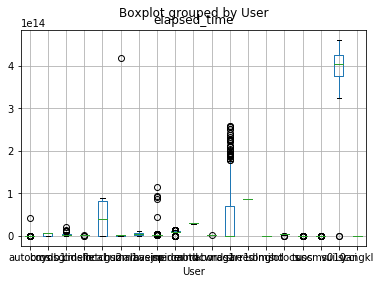

In [77]:
boxplot = accre_user_elapsed.boxplot(column='elapsed_time',by='User')

In [78]:
sns.jointplot(x='User', y='elapsed_time', data=data_returns

SyntaxError: unexpected EOF while parsing (<ipython-input-78-fbe0664915b2>, line 1)

In [ ]:
boxplot = accre_user_elapsed.boxplot ser.resample('D').sum().plot()